In [1]:
import pandas as pd
from rdkit.Chem import PandasTools, Draw
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit import DataStructs
from rdkit.ML.Cluster import Butina
import seaborn as sns
from IPython.core.display import HTML
PandasTools.RenderImagesInAllDataFrames(images=True)

import rdkit
print(rdkit.__version__)

2023.03.3


In [2]:
INFILE = 'KinaseLigandSMILES.csv'

In [3]:
def butina_cluster(mols, cutoff=0.35):
    fps = [AllChem.GetMorganFingerprintAsBitVect(mol, 2, 2048) for mol in mols ]
    dists = []
    nfps = len(fps)
    for i in range(1, nfps):
        sims = DataStructs.BulkTanimotoSimilarity(fps[i], fps[:i])
        dists.extend( [1-x for x in sims] )
    clusters = Butina.ClusterData(dists, nfps, cutoff, isDistData=True)
    # Assign a cluster ID to each molecule
    cluster_id_list = [0]*nfps
    for idx,cluster in enumerate(clusters, 1):
        for member in cluster:
            cluster_id_list[member] = idx
    return cluster_id_list

In [4]:
df = pd.read_csv(INFILE)
print(df.shape)

(58800, 1)


In [5]:
df.head()

/home/smathias/.pyenv/versions/3.9.11/envs/rdkit/lib/python3.9/site-packages/rdkit/Chem/PandasPatcher.py:132: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  for col in df_subset.columns[df_subset.applymap(MolFormatter.is_mol).any()]


,SMILES
0,CCc1nc(C(N)=O)c(Nc2ccc(N3CCC(N4CCN(C)CC4)CC3)c...
1,CNC(=O)c1nccc(c1)Oc1ccc(cc1)NC(=O)Nc1ccc(c(c1)...
2,CC(C)Nc1cc(-c2[nH]c([S+](C)[O-])nc2-c2ccc(F)cc...
3,CC(C)[C@H](C)Nc1cc(-c2[nH]c([S+](C)[O-])nc2-c2...
4,O=C1Nc2ccc(I)cc2C1=Cc1cc(Br)c(O)c(Br)c1


In [6]:
PandasTools.AddMoleculeColumnToFrame(df, smilesCol="SMILES")

/home/smathias/.pyenv/versions/3.9.11/envs/rdkit/lib/python3.9/site-packages/rdkit/Chem/PandasPatcher.py:132: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  for col in df_subset.columns[df_subset.applymap(MolFormatter.is_mol).any()]


,SMILES,ROMol
0,CCc1nc(C(N)=O)c(Nc2ccc(N3CCC(N4CCN(C)CC4)CC3)c...,
1,CNC(=O)c1nccc(c1)Oc1ccc(cc1)NC(=O)Nc1ccc(c(c1)...,
2,CC(C)Nc1cc(-c2[nH]c([S+](C)[O-])nc2-c2ccc(F)cc...,
3,CC(C)[C@H](C)Nc1cc(-c2[nH]c([S+](C)[O-])nc2-c2...,
4,O=C1Nc2ccc(I)cc2C1=Cc1cc(Br)c(O)c(Br)c1,

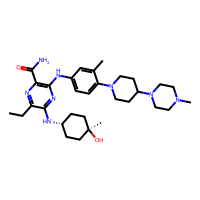
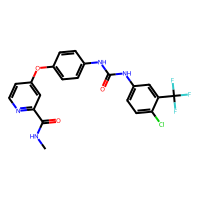
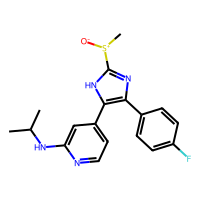
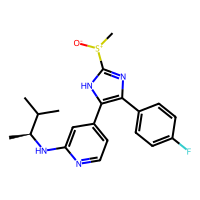
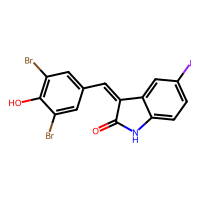

In [7]:
def show(df):
    return HTML(df.to_html(notebook=True))
show(df.head())

In [8]:
%time df['Cluster'] = butina_cluster(df.ROMol.values, cutoff=0.5)

CPU times: user 9min 38s, sys: 1min 20s, total: 10min 59s
Wall time: 10min 58s


/home/smathias/.pyenv/versions/3.9.11/envs/rdkit/lib/python3.9/site-packages/rdkit/Chem/PandasPatcher.py:132: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  for col in df_subset.columns[df_subset.applymap(MolFormatter.is_mol).any()]


,SMILES,ROMol,Cluster
0,CCc1nc(C(N)=O)c(Nc2ccc(N3CCC(N4CCN(C)CC4)CC3)c...,,513
1,CNC(=O)c1nccc(c1)Oc1ccc(cc1)NC(=O)Nc1ccc(c(c1)...,,296
2,CC(C)Nc1cc(-c2[nH]c([S+](C)[O-])nc2-c2ccc(F)cc...,,822
3,CC(C)[C@H](C)Nc1cc(-c2[nH]c([S+](C)[O-])nc2-c2...,,822
4,O=C1Nc2ccc(I)cc2C1=Cc1cc(Br)c(O)c(Br)c1,,2914

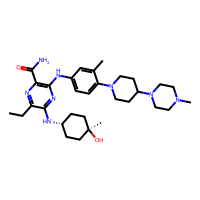
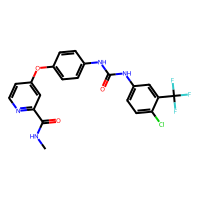
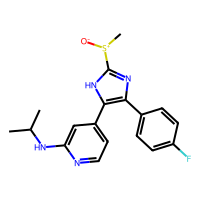
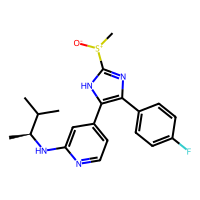
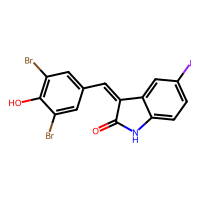

In [9]:
show(df.head())

In [13]:
print(df.max(axis=0, numeric_only=True))

Cluster    5275
dtype: int64


In [14]:
sdf = df.sort_values(by=['Cluster'], ascending=True)

/home/smathias/.pyenv/versions/3.9.11/envs/rdkit/lib/python3.9/site-packages/rdkit/Chem/PandasPatcher.py:132: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  for col in df_subset.columns[df_subset.applymap(MolFormatter.is_mol).any()]


,SMILES,ROMol,Cluster
33777,N#C[C@@H]1CCN(Cc2cccnn2)C[C@H]1n1cc(C(N)=O)c(N...,,1
33787,Cc1ncoc1CN1CC[C@@H](C#N)[C@H](n2cc(C(N)=O)c(Nc...,,1
35257,CC1(COC(=O)N2CC[C@@H](C#N)[C@H](n3cc(C(N)=O)c(...,,1
44579,CN(C)C(=O)c1ccc(Nc2nn([C@H]3COCC[C@@H]3C#N)cc2...,,1
43896,N#C[C@@H]1CN(C(=O)OC2CCOC2)CC[C@H]1n1cc(C(N)=O...,,1

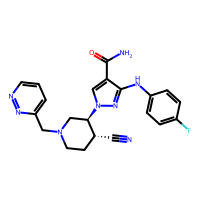
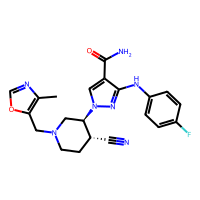
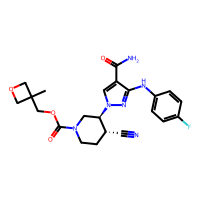
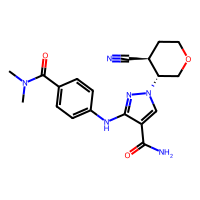
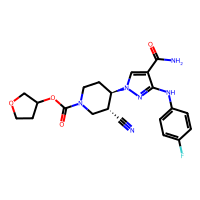

In [15]:
show(sdf.head())

In [16]:
sdf.to_csv('KinaseLigandClusters.csv', columns=['SMILES','Cluster'])

In [17]:
! pwd

/home/smathias/RDKit


In [18]:
! hostname

habanero.health.unm.edu
